In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

## Standard Linear Regression Using Newton's Method

In [8]:
def newton_method_linear_regression(X, y, max_iter=20, tol=1e-6):

    # Initializations
    n_features = X.shape[1]
    beta = np.zeros(n_features)
    convergence = []
    accuracy = []

    for iteration in range(max_iter):
        # Calculate predictions
        predictions = X @ beta

        # Compute residuals
        residuals = y - predictions

        # Compute gradient
        gradient = -X.T @ residuals

        # Compute Hessian
        hessian = X.T @ X

        # Update beta using Newton's method
        beta_update = np.linalg.solve(hessian, gradient)
        beta -= beta_update

        # Track convergence
        grad_norm = np.linalg.norm(beta_update, ord=2)
        convergence.append(grad_norm)
        accuracy.append(r2_score(y, predictions))

        # Check for convergence
        if grad_norm < tol:
            print(f"Converged in {iteration + 1} iterations.")
            break
    else:
        print("Newton's Method did not converge within the maximum number of iterations.")

    return beta, convergence, accuracy

In [ ]:
df = pd.read_excel('data.xlsx')
df['Day of Period End'] = pd.to_datetime(df['Day of Period End'])
df['Month'] = df['Day of Period End'].dt.month
df['Year'] = df['Day of Period End'].dt.year
df.head()

,Region,Day of Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,...,Inventory MoM,Inventory YoY,Days on Market,Days on Market MoM,Days on Market YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY,Month,Year
0,"Los Angeles, CA metro area",2012-01-31,290000,-0.061489,-0.061489,5039,-0.221054,-0.018504,8334,0.513622,...,-0.000681,-0.187052,70,3,-1,0.976345,0.000744,-0.005302,1,2012
1,NaN,2012-02-29,300000,0.034483,-0.047619,5264,0.044652,0.126954,8173,-0.019318,...,-0.037994,-0.221945,68,-2,-10,0.976617,0.000273,-0.003935,2,2012
2,NaN,2012-03-31,310000,0.033333,-0.031250,6804,0.292553,0.029661,8468,0.036094,...,-0.069575,-0.279209,65,-3,-6,0.979144,0.002527,-0.000447,3,2012
3,NaN,2012-04-30,315000,0.016129,-0.030769,6643,-0.023663,0.057971,7992,-0.056212,...,-0.048269,-0.321468,56,-9,-6,0.981124,0.001980,0.000433,4,2012
4,NaN,2012-05-31,320000,0.015873,0.000000,7378,0.110643,0.206344,8392,0.050050,...,-0.069113,-0.377525,50,-6,-7,0.984935,0.003811,0.005345,5,2012


In [ ]:
feature_columns = ['Month', 'Year', 'Homes Sold', 'New Listings', 'Inventory', 'Days on Market', 'Average Sale To List']
target_column = 'Median Sale Price'

# Extract features (X) and target (y)
X = df[feature_columns].values
y = df[target_column].values

# Add a column of ones to X for the intercept
X = np.hstack([np.ones((X.shape[0], 1)), X])

In [ ]:
# Fit the model using Newton's Method
beta_estimates, convergence, accuracy = newton_method_linear_regression(X, y)

# Print results
print("Estimated coefficients:", beta_estimates)

Converged in 3 iterations.
Estimated coefficients: [-8.76050983e+07  5.13026593e+03  4.27575239e+04 -4.54909245e+00
  2.73854573e+00  4.82258189e-01 -7.01808662e+02  1.93598454e+06]


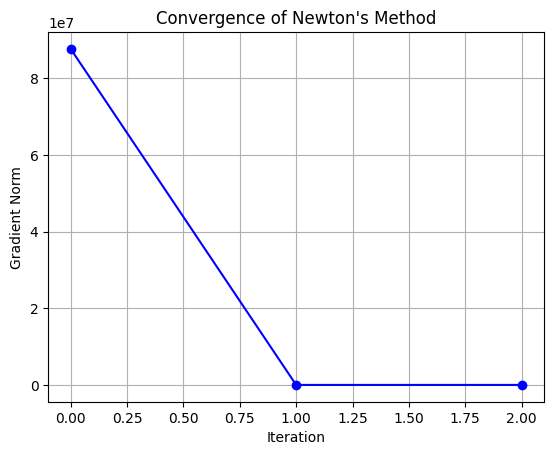

In [ ]:
# Plot convergence
plt.figure()
plt.plot(convergence, marker='o', linestyle='-', color='b')
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.title('Convergence of Newton\'s Method')
plt.grid(True)
plt.show()


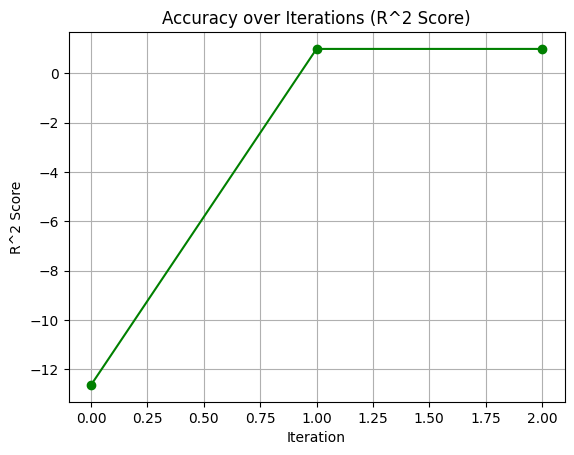

In [ ]:
# Plot accuracy
plt.figure()
plt.plot(accuracy, marker='o', linestyle='-', color='g')
plt.xlabel('Iteration')
plt.ylabel('R^2 Score')
plt.title('Accuracy over Iterations (R^2 Score)')
plt.grid(True)
plt.show()

In [ ]:
def linear_regression_closed_form(X, y):
    """ Computes the closed-form solution for Linear Regression. """
    n_features = X.shape[1]
    return np.linalg.inv(X.T @ X) @ X.T @ y

In [ ]:
# Compute the closed-form solution
beta_closed_form = linear_regression_closed_form(X, y)

In [ ]:
# Print and compare both solutions
print("Beta from Newton's Method:", beta_estimates)
print("Beta from Closed-Form Solution:", beta_closed_form)

# Check the difference
difference = np.linalg.norm(beta_estimates - beta_closed_form)
print("Difference between Newton's Method and Closed-Form Solution:", difference)

Beta from Newton's Method: [-8.76050983e+07  5.13026593e+03  4.27575239e+04 -4.54909245e+00
  2.73854573e+00  4.82258189e-01 -7.01808662e+02  1.93598454e+06]
Beta from Closed-Form Solution: [-8.76050983e+07  5.13026593e+03  4.27575239e+04 -4.54909245e+00
  2.73854572e+00  4.82258195e-01 -7.01808662e+02  1.93598454e+06]
Difference between Newton's Method and Closed-Form Solution: 0.0014556034594900413


## Ridge Regression Using Newton's Method

In [67]:
# Newton's method for ridge regression
def ridge_regression_newton(X, y, lambda_, max_iter=10, tol=1e-9):

    #Initializations
    n_features = X.shape[1]
    beta = np.zeros(n_features)
    convergence = []
    accuracy = []

    for iteration in range(max_iter):
        # Calculate predictions
        predictions = X @ beta

        # Compute residuals
        residuals = y - predictions

        # Compute gradient
        gradient = -X.T @ residuals + lambda_ * beta

        # Compute Hessian
        hessian = X.T @ X + lambda_ * np.eye(n_features)

        # Update beta using Newton's method
        beta_update = np.linalg.solve(hessian, gradient) #beta_update = np.linalg.pinv(hessian) @ gradient
        beta -= beta_update

        # Track convergence
        grad_norm = np.linalg.norm(beta_update, ord=2)
        convergence.append(grad_norm)
        accuracy.append(r2_score(y, predictions))

        # Check for convergence
        if grad_norm < tol:
            print(f"Converged in {iteration} iterations.")
            break
    else:
        print("Newton's Method did not converge within the maximum number of iterations.")

    return beta, convergence, accuracy

In [28]:
# Closed form solution for ridge regression
def ridge_regression_closed_form(X, y, lambda_):
    n_features = X.shape[1]
    I = np.eye(n_features)
    return np.linalg.inv(X.T @ X + lambda_ * I) @ X.T @ y

## Reading in Data

In [ ]:
data = pd.read_csv('realtor-data.zip.csv')
data.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [ ]:
# Filter the data
data = data[(data['state'] == 'California') & (data['status'] == 'for_sale')]
len(data)

101034

In [ ]:
# Clean the data
# Zipcode is not null or zero
data = data[(data['zip_code'].isna() == False) & (data['zip_code'] != 0.0)]
data['zip_code'] = data['zip_code'].astype(int).astype(str)

# Status as string
data['status'] = data['status'].astype(str)
data['city'] = data['city'].astype(str)
data['bed'] = data['bed'].fillna(0).astype(int)
data['bath'] = data['bath'].fillna(0).astype(int)
data['price'] = data['price'].fillna(0).astype(int)
data['house_size'] = data['house_size'].fillna(0).astype(int)
data['zip_code'] = data['zip_code'].astype(str)
# Filter out where bed and bath are zero
data = data[(data['bed'] != 0) & (data['bath'] != 0) & (data['price'] != 0) & (data['house_size'] != 0)]

In [ ]:
# Ensure data types
data.dtypes

,0
brokered_by,float64
status,object
price,int64
bed,int64
bath,int64
acre_lot,float64
street,float64
city,object
state,object
zip_code,object


In [ ]:
# Explore the data- important features
data.columns
# Likely important features- house size bed, bath, city, zip_code

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date'],
      dtype='object')

In [ ]:
# Linear regression model- human chosen features
# Create subset of relevant columns
subset = data[['price', 'bed', 'bath', 'acre_lot', 'house_size', 'city']]
subset = subset.dropna()
# Turn city into dummy variable
features = subset.loc[:, subset.columns != 'price']
features = pd.get_dummies(features, columns=['city'], drop_first=True)
features = features.drop(columns=['city_nan'])
labels = subset['price']

# Ensure all columns are numeric
features = features.apply(pd.to_numeric)

In [ ]:
features.columns

Index(['bed', 'bath', 'acre_lot', 'house_size', 'city_Acton', 'city_Adelanto',
       'city_Adin', 'city_Agoura Hills', 'city_Agua Dulce', 'city_Aguanga',
       ...
       'city_Yorkville', 'city_Yosemite National Park', 'city_Yosemite West',
       'city_Yountville', 'city_Yreka', 'city_Yuba City', 'city_Yucaipa',
       'city_Yucca Valley', 'city_Zamora', 'city_Zenia'],
      dtype='object', length=1281)

In [ ]:
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.2, random_state=42)

model = LinearRegression()

## Linear Regresison model

In [ ]:
model.fit(features_train, labels_train)

LinearRegression()

In [ ]:
print(model.coef_)

[-3.13868902e+05  2.71544436e+05  7.66473280e+00 ... -3.62415397e+04
  1.43970839e+05  2.00180380e+06]


## Extracting features

In [ ]:
# Extract features (X) and target (y)
X = features_train
y = labels_train

In [ ]:
X

,bed,bath,acre_lot,house_size,city_Acton,city_Adelanto,city_Adin,city_Agoura Hills,city_Agua Dulce,city_Aguanga,...,city_Yorkville,city_Yosemite National Park,city_Yosemite West,city_Yountville,city_Yreka,city_Yuba City,city_Yucaipa,city_Yucca Valley,city_Zamora,city_Zenia
1292338,1,1,0.02,684,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1302654,3,2,0.55,1362,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1337144,2,2,0.02,1658,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1317517,3,3,2.94,1732,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1343280,3,2,0.11,1435,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310818,12,6,0.23,3968,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1263745,7,8,0.57,6840,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1338295,3,3,0.03,1564,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1257603,8,8,0.23,6414,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Convert all columns to float type for compatibility with Newton's method
X = X.astype(float)

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Add a column of ones to X for the intercept
X = np.hstack([np.ones((X.shape[0], 1)), X])

In [ ]:
X

array([[ 1.        , -1.11826161, -0.82281923, ..., -0.05142774,
        -0.00431006, -0.00862037],
       [ 1.        , -0.23641027, -0.35788793, ..., -0.05142774,
        -0.00431006, -0.00862037],
       [ 1.        , -0.67733594, -0.35788793, ..., -0.05142774,
        -0.00431006, -0.00862037],
       ...,
       [ 1.        , -0.23641027,  0.10704337, ..., -0.05142774,
        -0.00431006, -0.00862037],
       [ 1.        ,  1.96821808,  2.43169985, ..., -0.05142774,
        -0.00431006, -0.00862037],
       [ 1.        ,  0.2045154 ,  0.10704337, ..., -0.05142774,
        -0.00431006, -0.00862037]])

In [ ]:
print(np.linalg.det(X.T @ X))

0.0


## Reading Gabby's data

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
features_train_new = pd.read_csv('/content/drive/MyDrive/features_train.csv')
features_test_new = pd.read_csv('/content/drive/MyDrive/features_test.csv')
labels_train_new = pd.read_csv('/content/drive/MyDrive/labels_train.csv')
labels_test_new = pd.read_csv('/content/drive/MyDrive/labels_test.csv')

In [31]:
features_train_new.drop(columns=['Unnamed: 0'], inplace=True)
features_test_new.drop(columns=['Unnamed: 0'], inplace=True)

In [32]:
np.linalg.matrix_rank(features_train_new)

1957

In [33]:
# Only keep columns that are not one-hot encoded to perform Newton's method
columns_to_keep = ['bed', 'bath', 'acre_lot', 'house_size']
features_train_new = features_train_new[columns_to_keep]
features_test_new = features_test_new[columns_to_keep]
features_train_new.head()

,bed,bath,acre_lot,house_size
0,3,2,2.31,1680
1,3,2,0.88,1585
2,3,3,0.17,1950
3,4,3,0.27,2975
4,4,5,0.14,2191


In [34]:
labels_train_new = labels_train_new.drop(columns=['Unnamed: 0'])
labels_test_new = labels_test_new.drop(columns=['Unnamed: 0'])

In [35]:
# Extract features (X) and target (y)
X = features_train_new
y = labels_train_new

In [36]:
# Convert all columns to float type for compatibility with Newton's method
X = X.astype(float)

In [37]:
# Normalize columns of X
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [38]:
# Add a column of ones to X for the intercept
X = np.hstack([np.ones((X.shape[0], 1)), X])

In [39]:
X

array([[ 1.        , -0.2397983 , -0.3618885 , -0.01684786, -0.2460599 ],
       [ 1.        , -0.2397983 , -0.3618885 , -0.01811395, -0.29703425],
       [ 1.        , -0.2397983 ,  0.11443566, -0.01874257, -0.10118544],
       ...,
       [ 1.        , -0.2397983 , -0.3618885 , -0.01876913, -0.33298458],
       [ 1.        , -0.2397983 ,  0.11443566, -0.01848581,  0.1708566 ],
       [ 1.        , -0.2397983 , -0.3618885 , -0.01446619, -0.50039507]])

In [40]:
print(np.linalg.det(X.T @ X))

6.148015665735365e+22


In [41]:
y = np.array(y).ravel()
labels_test_new = np.array(labels_test_new)

## Test

In [17]:
n_features = X.shape[1]
beta = np.zeros(n_features)
convergence = []
accuracy = []
print(n_features, beta)

5 [0. 0. 0. 0. 0.]


In [18]:
# Calculate predictions
predictions = X @ beta
print(predictions)
print(np.shape(predictions))
print(np.shape(y))

[0. 0. 0. ... 0. 0. 0.]
(53832,)
(53832, 1)


In [21]:
y = y.ravel()
print(np.shape(y))

(53832,)


In [22]:
# Compute residuals
residuals = y - predictions
print(residuals)

[275000. 874900. 799000. ... 380000. 599900. 445000.]


In [23]:
lambda_ = 1e-6
# Compute gradient
gradient = -X.T @ residuals + lambda_ * beta
print(gradient)

[-6.79042627e+10 -3.87960185e+10 -6.60455725e+10 -1.22138489e+08
 -8.63490648e+10]


In [24]:


# Compute Hessian
hessian = X.T @ X + lambda_ * np.eye(n_features)
print(hessian)

# Update beta using Newton's method
beta_update = np.linalg.solve(hessian, gradient) #beta_update = np.linalg.pinv(hessian) @ gradient
beta -= beta_update

# Track convergence
grad_norm = np.linalg.norm(beta_update, ord=2)
convergence.append(grad_norm)
accuracy.append(r2_score(y, predictions))

[[ 5.38320000e+04 -7.06634751e-12  8.70414851e-13 -1.65201186e-13
  -8.88178420e-14]
 [-7.06634751e-12  5.38320000e+04  4.42603672e+04 -3.75910970e+02
   3.44577280e+04]
 [ 8.70414851e-13  4.42603672e+04  5.38320000e+04 -1.19858335e+02
   4.09828597e+04]
 [-1.65201186e-13 -3.75910970e+02 -1.19858335e+02  5.38320000e+04
  -1.38987734e+02]
 [-8.88178420e-14  3.44577280e+04  4.09828597e+04 -1.38987734e+02
   5.38320000e+04]]


## Running Newton's Method Ridge Regression

In [68]:
# Set regularization parameter
lambda_ = 1e-2

# Fit the model using Ridge Regression with Newton's Method
beta_estimates, convergence, accuracy = ridge_regression_newton(X, y, lambda_)

# Print results
print("Estimated coefficients:", beta_estimates)

Converged in 2 iterations.
Estimated coefficients: [ 1.26141050e+06 -9.60053128e+05  7.78317945e+05  1.49596947e+03
  1.62603676e+06]


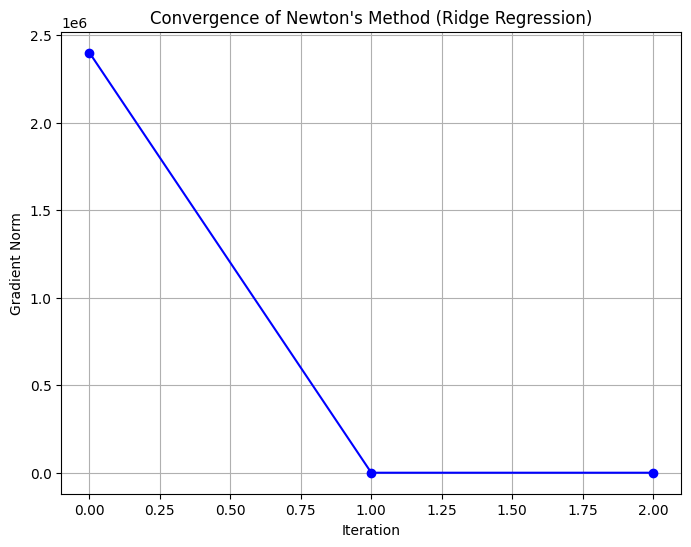

In [69]:
# Plot convergence
plt.figure(figsize=(8, 6))
plt.plot(convergence, marker='o', linestyle='-', color='b')
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.title('Convergence of Newton\'s Method (Ridge Regression)')
plt.grid(True)
plt.show()

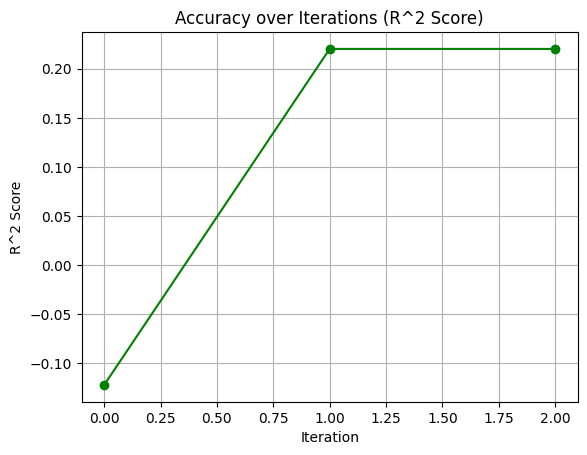

In [70]:
# Plot accuracy
plt.figure()
plt.plot(accuracy, marker='o', linestyle='-', color='g')
plt.xlabel('Iteration')
plt.ylabel('R^2 Score')
plt.title('Accuracy over Iterations (R^2 Score)')
plt.grid(True)
plt.show()

In [71]:
# Compute the closed-form solution
beta_closed_form = ridge_regression_closed_form(X, y, lambda_)

In [72]:
# Print and compare both solutions
print("Beta from Newton's Method:", beta_estimates)
print("Beta from Closed-Form Solution:", beta_closed_form)

# Check the difference
difference = np.linalg.norm(beta_estimates - beta_closed_form)
print("Difference between Newton's Method and Closed-Form Solution:", difference)

Beta from Newton's Method: [ 1.26141050e+06 -9.60053128e+05  7.78317945e+05  1.49596947e+03
  1.62603676e+06]
Beta from Closed-Form Solution: [ 1.26141050e+06 -9.60053128e+05  7.78317945e+05  1.49596947e+03
  1.62603676e+06]
Difference between Newton's Method and Closed-Form Solution: 1.734570748542001e-09


In [74]:
# R^2 score
print(accuracy[-1])

0.220144954488814
